In [1]:
# libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_excel('/content/campaign_data_knovista_project.xlsx')
data

,Campaign,Total Leads,Sales,Conversion Rate (%),Cost per Lead,Total Cost
0,PY | KL | Fee included 2,60,6,10.00,68.62,4117.20
1,DA | KL | No monitory benefit 13,173,3,1.73,47.97,8298.81
2,PY | KL | Hiring,65,0,0.00,55.63,3615.95
3,PY | KL | Fee included,231,11,4.76,41.15,9505.65
4,DA | KL | Hiring,294,11,3.74,28.06,8249.64
...,...,...,...,...,...,...
5995,BA-Hiring 1,137,9,6.57,20.12,2756.44
5996,PY | KL | Hiring | Sep 18,165,6,3.64,22.49,3710.85
5997,PY | KL | Hiring | Sep 9,218,16,7.34,39.44,8597.92
5998,PY | KL | Hiring | Sep 9,198,13,6.57,35.23,6975.54


In [3]:
print(data.head(5))

                           Campaign  Total Leads  Sales  Conversion Rate (%)  \
0          PY | KL | Fee included 2           60      6                10.00   
1  DA | KL | No monitory benefit 13          173      3                 1.73   
2                 PY | KL | Hiring            65      0                 0.00   
3           PY | KL | Fee included           231     11                 4.76   
4                 DA | KL | Hiring           294     11                 3.74   

   Cost per Lead  Total Cost  
0          68.62     4117.20  
1          47.97     8298.81  
2          55.63     3615.95  
3          41.15     9505.65  
4          28.06     8249.64  


In [4]:
print(data.shape)
print(data.size)
print(data.isna().sum())   #no missing value

(6000, 6)
36000
Campaign               0
Total Leads            0
Sales                  0
Conversion Rate (%)    0
Cost per Lead          0
Total Cost             0
dtype: int64


In [5]:
print(data.dtypes)

Campaign                object
Total Leads              int64
Sales                    int64
Conversion Rate (%)    float64
Cost per Lead          float64
Total Cost             float64
dtype: object


In [6]:
print(data.tail())

                              Campaign  Total Leads  Sales  \
5995                       BA-Hiring 1          137      9   
5996         PY | KL | Hiring | Sep 18          165      6   
5997          PY | KL | Hiring | Sep 9          218     16   
5998          PY | KL | Hiring | Sep 9          198     13   
5999  DA | KL | No monitory benefit 24          260      5   

      Conversion Rate (%)  Cost per Lead  Total Cost  
5995                 6.57          20.12     2756.44  
5996                 3.64          22.49     3710.85  
5997                 7.34          39.44     8597.92  
5998                 6.57          35.23     6975.54  
5999                 1.92          25.70     6682.00  


In [7]:
# converting sales to target value[cam_success]
data['cam_success']=data['Sales'].apply(lambda l:1 if l > 0 else 0)
data['cam_success']

,cam_success
0,1
1,1
2,0
3,1
4,1
...,...
5995,1
5996,1
5997,1
5998,1


In [13]:
# droping
df=data.drop(['Campaign','Sales'],axis=1)

In [14]:
df

,Total Leads,Conversion Rate (%),Cost per Lead,Total Cost,cam_success
0,60,10.00,68.62,4117.20,1
1,173,1.73,47.97,8298.81,1
2,65,0.00,55.63,3615.95,0
3,231,4.76,41.15,9505.65,1
4,294,3.74,28.06,8249.64,1
...,...,...,...,...,...
5995,137,6.57,20.12,2756.44,1
5996,165,3.64,22.49,3710.85,1
5997,218,7.34,39.44,8597.92,1
5998,198,6.57,35.23,6975.54,1


In [59]:
# separation of input and output

x = df[['Total Leads', 'Conversion Rate (%)', 'Cost per Lead', 'Total Cost']]
y = df['cam_success']



In [54]:
# train_test_split

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)
print(xtest)
print(ytest)

      Total Leads  Conversion Rate (%)  Cost per Lead  Total Cost
1782          256                 7.81          23.81     6095.36
3917          111                 0.00          26.26     2914.86
221           196                 8.16          30.54     5985.84
2135           74                 5.41          44.90     3322.60
5224          123                 0.00          16.15     1986.45
...           ...                  ...            ...         ...
2543          144                 9.03          21.78     3136.32
1773          108                 8.33          13.33     1439.64
2846          269                 4.83          39.60    10652.40
5799          253                 7.51          16.70     4225.10
1765          195                 0.51          20.95     4085.25

[1200 rows x 4 columns]
1782    1
3917    0
221     1
2135    1
5224    0
       ..
2543    1
1773    1
2846    1
5799    1
1765    1
Name: cam_success, Length: 1200, dtype: int64


In [55]:
# model creation


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score
lr=LogisticRegression(max_iter=1000)

lr.fit(xtrain,ytrain)
pred=lr.predict(xtest)
pred

print("accuracy score: ",accuracy_score(ytest,pred))
print(classification_report(ytest,pred))

accuracy score:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        78
           1       1.00      1.00      1.00      1122

    accuracy                           1.00      1200
   macro avg       1.00      1.00      1.00      1200
weighted avg       1.00      1.00      1.00      1200



In [56]:
# model creation random forest


from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=100,random_state=42)

rfc.fit(xtrain,ytrain)
data_pred=rfc.predict(xtest)
print(rfc.predict([[1.96000e+02, 8.16000e+00, 3.05400e+01, 5.98584e+03]]))
data_pred

[1]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1, 0, 1, ..., 1, 1, 1])

In [57]:
print("accuracy score: ",accuracy_score(ytest,data_pred))
print(classification_report(ytest,data_pred))

accuracy score:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        78
           1       1.00      1.00      1.00      1122

    accuracy                           1.00      1200
   macro avg       1.00      1.00      1.00      1200
weighted avg       1.00      1.00      1.00      1200



**Feature importance**

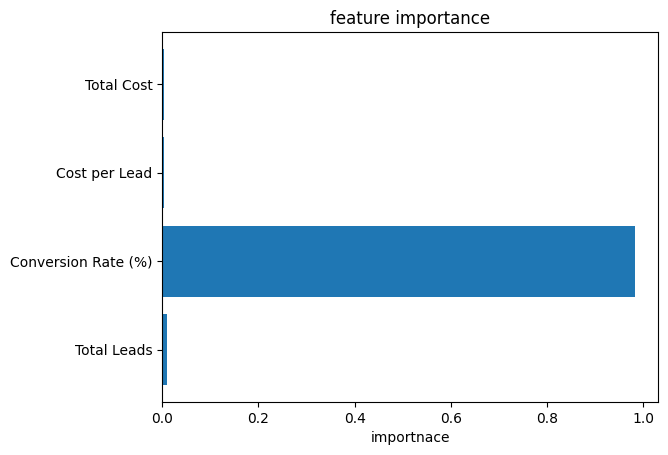

In [58]:
importance=rfc.feature_importances_
feature=x.columns
plt.barh(feature,importance)
plt.xlabel('importnace')
plt.title('feature importance')
plt.show()